In [305]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import geopandas

In [306]:
from tueplots import bundles
plt.rcParams.update(bundles.neurips2021(usetex=False))

In [307]:
df = pd.read_csv("../dat/drug_listings_cleaned.csv", index_col=0)
df

,product_title,product_description,ship_from,ship_to,seller,price,source,ship_to_alpha_3,ship_from_alpha_3,drug_name,grouped_drug_names
0,10mg Diazepam Tabletten - 10 Stück,- 10mg Diazepam Tabletten - 10 Stück\n\n- Disk...,Germany,Worldwide,1XAnOYMoUsX1BXx,$67.01,1776,NaN,DEU,Valium,Valium
1,10mg Diazepam Tabletten - 50 Stück,10 mg Diazepam / Valium / Valocordin Tabletten...,Germany,Worldwide,1XAnOYMoUsX1BXx,$93.82,1776,NaN,DEU,Valium,Valium
2,Sonderpreis !!! 10x Diazepam Tropfen 25ml,Diazepam / Valium / Valocordin Tropfen je Flas...,Germany,Worldwide,1XAnOYMoUsX1BXx,$938.32,1776,NaN,DEU,Valium,Valium
3,Sonderpreis !!! 2x Diazepam Tropfen 25ml,Diazepam / Valium / Valocordin Tropfen je Flas...,Germany,Worldwide,1XAnOYMoUsX1BXx,$214.46,1776,NaN,DEU,Valium,Valium
4,1 gr indian Ketamin,Very Strong Ketamin from India be careful\n\ni...,Austria,Worldwide,ACAB23,$50.00,1776,NaN,AUT,Ketamine,Ketamine
...,...,...,...,...,...,...,...,...,...,...,...
194428,∎∎ W. Domino XTC ∎∎ 220MG,White Domino XTC Pills from the Netherlands\n\...,Netherlands,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 42.86\nfor 5 Pills,themarketplace,NaN,NLD,MDMA,Amphetamines
194429,∎∎ White Domino XTC ► 220mg,White Domino XTC Pills from the Netherlands\n\...,Netherlands,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 42.48\nfor 5 Pills,themarketplace,NaN,NLD,MDMA,Amphetamines
194430,∎∎ White Domino XTC ► 220mg,White Domino XTC Pills from the Netherlands\n\...,Netherlands,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 42.82\nfor 5 Pills,themarketplace,NaN,NLD,MDMA,Amphetamines
194431,∎∎ Yellow Grenades ∎∎ 170MG,White Domino XTC Pills from the Netherlands\n\...,Europe,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 30.08\nfor 5 Pills,themarketplace,NaN,NaN,MDMA,Amphetamines


In [308]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [309]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [310]:
listings_shipped_from_each_country = df["ship_from_alpha_3"].value_counts().rename("ship_from_count").to_frame()
listings_shipped_from_each_country

,ship_from_count
USA,12723
GBR,6794
DEU,5030
NLD,4813
AUS,3565
...,...
GMB,1
SLV,1
CHL,1
GGY,1


In [311]:
merge = pd.merge(world, listings_shipped_from_each_country, left_on="iso_a3", right_index=True, how="left")
merge

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ship_from_count
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2931.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",12723.0
...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",3.0
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN


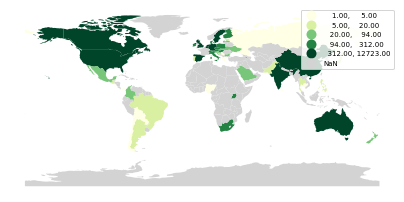

In [312]:
ax = merge.plot(column='ship_from_count', 
           legend=True,
           cmap='YlGn',
           scheme='quantiles',
           missing_kwds = dict(color = "lightgrey",), )
plt.axis('off');
#fig = ax.figure
#cb_ax = fig.axes[1] 
#cb_ax.tick_params(labelsize=20)
plt.savefig("ship_from_count_map_absolute.pdf", bbox_inches="tight")

In [313]:
merge["ship_from_count_normalized"] = merge["ship_from_count"] / merge["pop_est"]

In [314]:
merge.sort_values(by="ship_from_count_normalized", ascending=False).dropna().head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ship_from_count,ship_from_count_normalized
130,17084719,Europe,Netherlands,NLD,870800.0,"POLYGON ((6.90514 53.48216, 7.09205 53.14404, ...",4813.0,0.000282
137,23232413,Oceania,Australia,AUS,1189000.0,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",3565.0,0.000153
110,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",1109.0,0.000111
143,64769452,Europe,United Kingdom,GBR,2788000.0,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",6794.0,0.000105
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2931.0,0.000082
121,80594017,Europe,Germany,DEU,3979000.0,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...",5030.0,0.000062
133,5011102,Europe,Ireland,IRL,322000.0,"POLYGON ((-6.19788 53.86757, -6.03299 53.15316...",312.0,0.000062
129,11491346,Europe,Belgium,BEL,508600.0,"POLYGON ((6.15666 50.80372, 6.04307 50.12805, ...",619.0,0.000054
142,5605948,Europe,Denmark,DNK,264800.0,"MULTIPOLYGON (((9.92191 54.98310, 9.28205 54.8...",287.0,0.000051
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",12723.0,0.000039


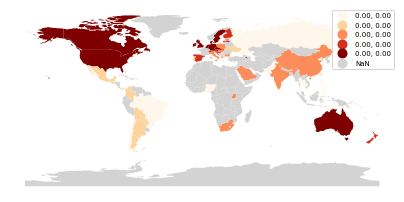

In [315]:
ax = merge.plot(column='ship_from_count_normalized', 
                legend=True,
                cmap='OrRd',
                scheme='quantiles',
                missing_kwds = dict(color = "lightgrey",))
plt.axis('off');
#fig = ax.figure
#cb_ax = fig.axes[1] 
#cb_ax.tick_params(labelsize=20)
plt.savefig("ship_from_count_map_normalized.pdf", bbox_inches="tight")

Let's do the same for shipping availability *to* each country:

In [316]:
ship_to_alpha_3 = df["ship_to_alpha_3"].dropna()
ship_to_countries = ship_to_alpha_3.str.split(",")
all_ship_to_countries = [country for cntries in ship_to_countries for country in cntries]
shipping_availability_to_each_country = pd.Series(all_ship_to_countries).value_counts().rename("ship_to_count").to_frame()
shipping_availability_to_each_country

,ship_to_count
USA,12583
GBR,5601
AUS,3859
DEU,3173
SWE,3040
...,...
SEN,1
SGP,1
LKA,1
TWN,1


In [317]:
merge = pd.merge(merge, shipping_availability_to_each_country, left_on="iso_a3", right_index=True, how="left")
merge

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ship_from_count,ship_from_count_normalized,ship_to_count
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,7.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2931.0,8.227673e-05,1017.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",12723.0,3.895283e-05,12583.0
...,...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",3.0,4.218802e-07,201.0
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,202.0
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN


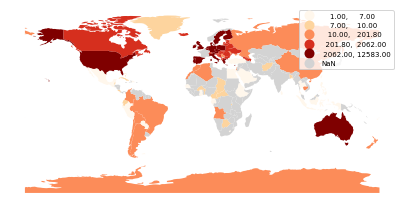

In [318]:
ax = merge.plot(column='ship_to_count', 
                legend=True,
                cmap='OrRd',
                scheme='quantiles',
                missing_kwds = dict(color = "lightgrey",))
#fig = ax.figure
#cb_ax = fig.axes[1] 
#cb_ax.tick_params(labelsize=20)
plt.axis('off');
plt.savefig("ship_to_count_map_absolute.pdf", bbox_inches="tight")

In [319]:
merge["ship_to_count_normalized"] = merge["ship_to_count"] / merge["pop_est"]

In [320]:
merge.sort_values(by="ship_to_count_normalized", ascending=False).head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ship_from_count,ship_from_count_normalized,ship_to_count,ship_to_count_normalized
128,594130,Europe,Luxembourg,LUX,58740.0,"POLYGON ((6.04307 50.12805, 6.24275 49.90223, ...",13.0,0.000022,2189.0,0.003684
159,4050,Antarctica,Antarctica,ATA,810.0,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...",NaN,NaN,12.0,0.002963
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...",NaN,NaN,7.0,0.002388
161,1221549,Asia,Cyprus,CYP,29260.0,"POLYGON ((32.73178 35.14003, 32.91957 35.08783...",NaN,NaN,2158.0,0.001767
120,1251581,Europe,Estonia,EST,38700.0,"POLYGON ((27.98113 59.47537, 27.98112 59.47537...",9.0,0.000007,2054.0,0.001641
119,1944643,Europe,Latvia,LVA,50650.0,"POLYGON ((27.28818 57.47453, 27.77002 57.24426...",34.0,0.000017,2048.0,0.001053
150,1972126,Europe,Slovenia,SVN,68350.0,"POLYGON ((13.80648 46.50931, 14.63247 46.43182...",22.0,0.000011,2048.0,0.001038
144,339747,Europe,Iceland,ISL,16150.0,"POLYGON ((-14.50870 66.45589, -14.73964 65.808...",NaN,NaN,346.0,0.001018
118,2823859,Europe,Lithuania,LTU,85620.0,"POLYGON ((26.49433 55.61511, 26.58828 55.16718...",NaN,NaN,2049.0,0.000726
126,4292095,Europe,Croatia,HRV,94240.0,"POLYGON ((16.56481 46.50375, 16.88252 46.38063...",94.0,0.000022,2062.0,0.000480


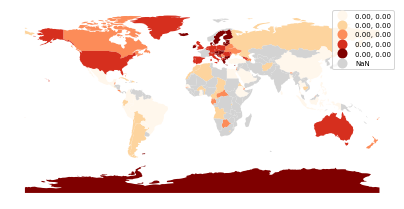

In [321]:
ax = merge.plot(column='ship_to_count_normalized', 
           legend=True,
           cmap='OrRd',
           scheme='quantiles',
           missing_kwds = dict(color = "lightgrey",))
plt.axis('off');
#fig = ax.figure
#cb_ax = fig.axes[1] 
#cb_ax.tick_params(labelsize=20)
plt.savefig("ship_to_count_map_normalized.pdf", bbox_inches="tight")

As we can see, this normalization does not make much sense, because many countries have similar shipping availability (e.g. european countries are often simply listed in a long list), which means that the smaller countries simply get a disproportionally high weight.

We will now add the [OWID data on mental and substance use disorders](https://ourworldindata.org/grapher/share-with-mental-and-substance-disorders) to our data:

In [322]:
# source: https://ourworldindata.org/grapher/share-with-mental-and-substance-disorders
df_mental_health = pd.read_csv("../dat/share-with-mental-and-substance-disorders.csv")
df_mental_health.columns = ["entity", "code", "year", "mental_disorder_prevalence"]
df_mental_health

,entity,code,year,mental_disorder_prevalence
0,Afghanistan,AFG,1990,16.659229
1,Afghanistan,AFG,1991,16.765052
2,Afghanistan,AFG,1992,16.874469
3,Afghanistan,AFG,1993,16.990720
4,Afghanistan,AFG,1994,17.112730
...,...,...,...,...
8155,Zimbabwe,ZWE,2015,11.156429
8156,Zimbabwe,ZWE,2016,11.164133
8157,Zimbabwe,ZWE,2017,11.170427
8158,Zimbabwe,ZWE,2018,11.158765


In [323]:
df_mental_health_current = df_mental_health[df_mental_health.year == 2019]
df_mental_health_current

,entity,code,year,mental_disorder_prevalence
29,Afghanistan,AFG,2019,17.117612
59,Africa,NaN,2019,12.669475
89,African Region,NaN,2019,12.211424
119,African Union,NaN,2019,12.669475
149,Albania,ALB,2019,11.558431
...,...,...,...,...
8039,World Bank Regions,NaN,2019,12.798057
8069,World Bank Upper Middle Income,NaN,2019,12.500398
8099,Yemen,YEM,2019,16.401522
8129,Zambia,ZMB,2019,12.112616


In [324]:
merge = pd.merge(merge, df_mental_health_current, left_on="iso_a3", right_on="code", how="left").drop(["entity", "code", "year"], axis=1)
merge

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ship_from_count,ship_from_count_normalized,ship_to_count,ship_to_count_normalized,mental_disorder_prevalence
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,7.0,0.000008,11.540048
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,12.584239
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2931.0,8.227673e-05,1017.0,0.000029,14.953563
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",12723.0,3.895283e-05,12583.0,0.000039,16.934621
...,...,...,...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",3.0,4.218802e-07,201.0,0.000028,11.379480
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,202.0,0.000314,11.634089
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,14.584065


<AxesSubplot:>

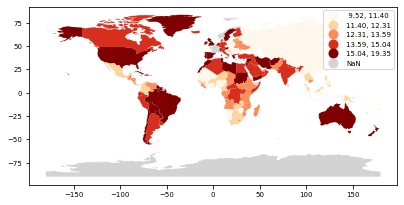

In [325]:
merge.plot(column='mental_disorder_prevalence', 
           legend=True,
           cmap='OrRd',
           scheme='quantiles',
           missing_kwds = dict(color = "lightgrey",))

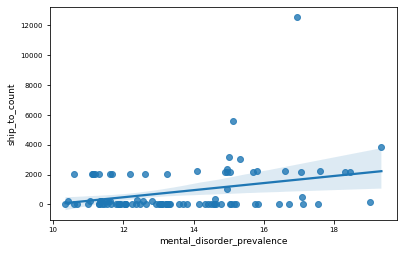

In [326]:
sns.regplot(x="mental_disorder_prevalence", y="ship_to_count", data=merge);

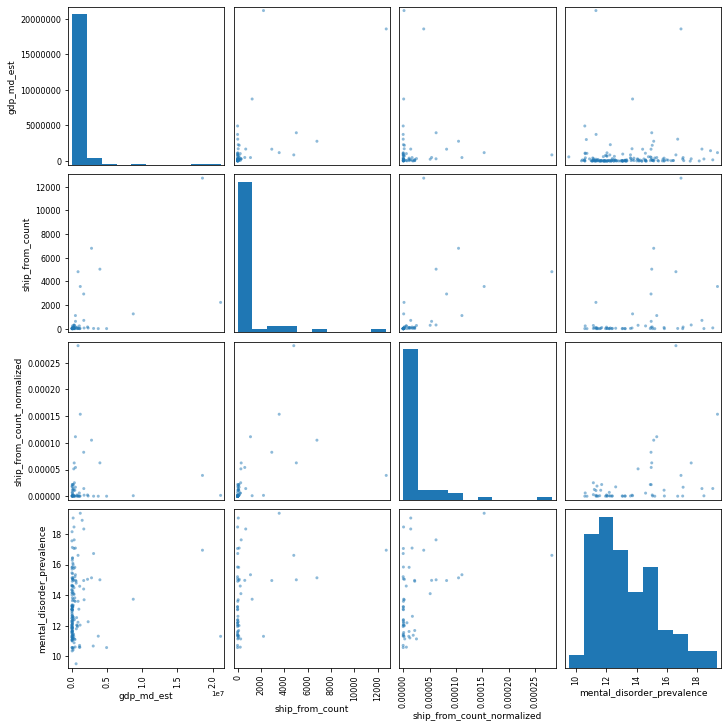

In [327]:
interesting_cols = ["gdp_md_est", "ship_from_count", "ship_from_count_normalized", "mental_disorder_prevalence"]
pd.plotting.scatter_matrix(merge[interesting_cols], figsize=(10,10));

## Shipping availability vs. drug deaths

In [354]:
df_total_disease_burden = pd.read_csv("../dat/drug-disorder-dalys-rate.csv")
df_total_disease_burden.columns = ["entity", "code", "year", "drug_use_disease_burden"]
df_total_disease_burden_current = df_total_disease_burden[df_total_disease_burden.year == df_total_disease_burden.year.max()]
merge = pd.merge(merge, df_total_disease_burden_current, left_on="iso_a3", right_on="code", how="left").drop(["entity", "code", "year"], axis=1)
merge

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ship_from_count,ship_from_count_normalized,ship_to_count,ship_to_count_normalized,mental_disorder_prevalence,opioid_death_rates_x,opioid_ship_to_count,amphetamine_death_rates,amphetamine_ship_to_count,cocaine_death_rates,cocaine_ship_to_count,opioid_death_rates_y,drug_use_disease_burden
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,7.0,0.000008,11.540048,0.243600,2.0,0.014754,NaN,0.024632,4.0,0.243600,97.303080
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,12.584239,0.413111,NaN,0.010575,NaN,0.028760,NaN,0.413111,81.268412
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2931.0,8.227673e-05,1017.0,0.000029,14.953563,4.673499,98.0,0.362555,262.0,0.789073,61.0,4.673499,798.992166
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",12723.0,3.895283e-05,12583.0,0.000039,16.934621,13.693335,1194.0,1.272203,2620.0,2.308889,548.0,13.693335,1890.957878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",3.0,4.218802e-07,201.0,0.000028,11.379480,0.580084,27.0,0.038668,51.0,0.022001,21.0,0.580084,114.409912
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,202.0,0.000314,11.634089,0.090891,27.0,0.006460,51.0,0.005013,21.0,0.090891,132.889603
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,14.584065,0.135451,NaN,0.036723,NaN,0.315391,NaN,0.135451,126.690229


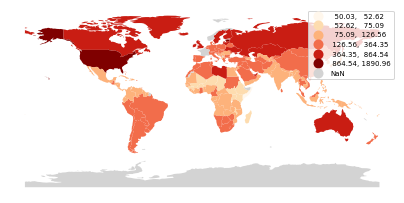

In [355]:
ax = merge.plot(column='drug_use_disease_burden', 
                legend=True,
                cmap='OrRd',
                scheme='percentiles',
                missing_kwds = dict(color = "lightgrey",))
plt.axis('off');
plt.savefig("drug_use_disease_burden.pdf", bbox_inches="tight")

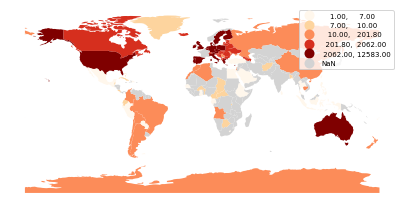

In [356]:
ax = merge.plot(column='ship_to_count', 
                legend=True,
                cmap='OrRd',
                scheme='quantiles',
                missing_kwds = dict(color = "lightgrey",))
plt.axis('off');

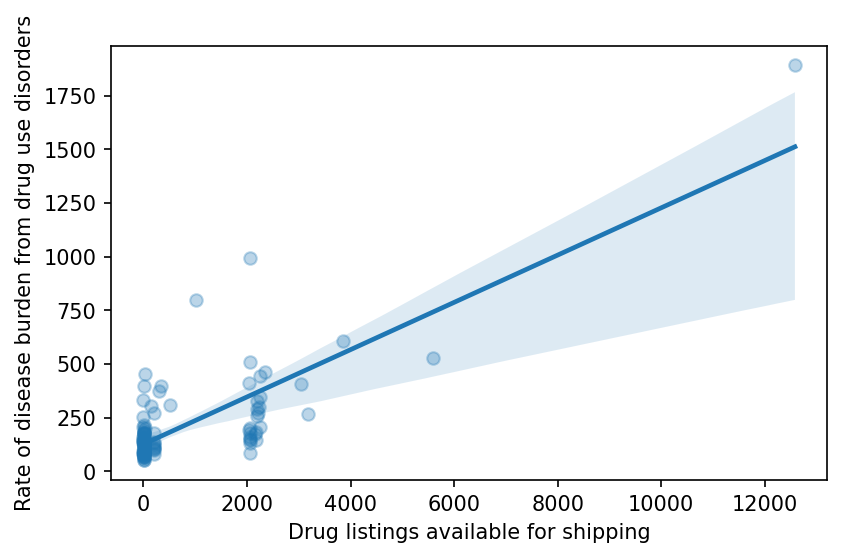

In [359]:
plt.figure(dpi=150)
sns.regplot(x="ship_to_count", y="drug_use_disease_burden", data=merge, scatter_kws={"alpha": 0.3});
plt.xlabel("Drug listings available for shipping", fontsize=10)
plt.ylabel("Rate of disease burden from drug use disorders", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("drug_listings_vs_disease_burden_regplot.pdf", bbox_inches="tight")

In [360]:
df_total_drug_deaths = pd.read_csv("../dat/death-rates-from-drug-use-disorders.csv")
df_total_drug_deaths.columns = ["entity", "code", "year", "drug_use_deaths"]
df_total_drug_deaths_current = df_total_drug_deaths[df_total_drug_deaths.year == df_total_drug_deaths.year.max()]
merge = pd.merge(merge, df_total_drug_deaths_current, left_on="iso_a3", right_on="code", how="left").drop(["entity", "code", "year"], axis=1)
merge

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ship_from_count,ship_from_count_normalized,ship_to_count,ship_to_count_normalized,mental_disorder_prevalence,opioid_death_rates_x,opioid_ship_to_count,amphetamine_death_rates,amphetamine_ship_to_count,cocaine_death_rates,cocaine_ship_to_count,opioid_death_rates_y,drug_use_disease_burden,drug_use_deaths
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,7.0,0.000008,11.540048,0.243600,2.0,0.014754,NaN,0.024632,4.0,0.243600,97.303080,0.349253
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,12.584239,0.413111,NaN,0.010575,NaN,0.028760,NaN,0.413111,81.268412,0.579421
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2931.0,8.227673e-05,1017.0,0.000029,14.953563,4.673499,98.0,0.362555,262.0,0.789073,61.0,4.673499,798.992166,6.282073
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",12723.0,3.895283e-05,12583.0,0.000039,16.934621,13.693335,1194.0,1.272203,2620.0,2.308889,548.0,13.693335,1890.957878,18.831391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",3.0,4.218802e-07,201.0,0.000028,11.379480,0.580084,27.0,0.038668,51.0,0.022001,21.0,0.580084,114.409912,0.777278
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,202.0,0.000314,11.634089,0.090891,27.0,0.006460,51.0,0.005013,21.0,0.090891,132.889603,0.154006
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,14.584065,0.135451,NaN,0.036723,NaN,0.315391,NaN,0.135451,126.690229,0.594282


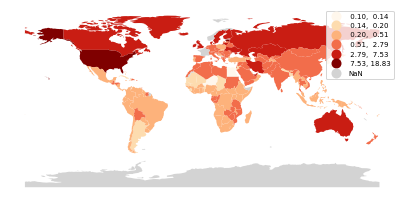

In [362]:
ax = merge.plot(column='drug_use_deaths', 
                legend=True,
                cmap='OrRd',
                scheme='percentiles',
                missing_kwds = dict(color = "lightgrey",))
plt.axis('off');
plt.savefig("drug_use_deaths.pdf", bbox_inches="tight")

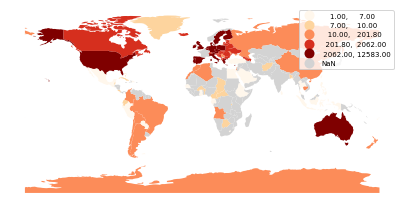

In [363]:
ax = merge.plot(column='ship_to_count', 
                legend=True,
                cmap='OrRd',
                scheme='quantiles',
                missing_kwds = dict(color = "lightgrey",))
plt.axis('off');

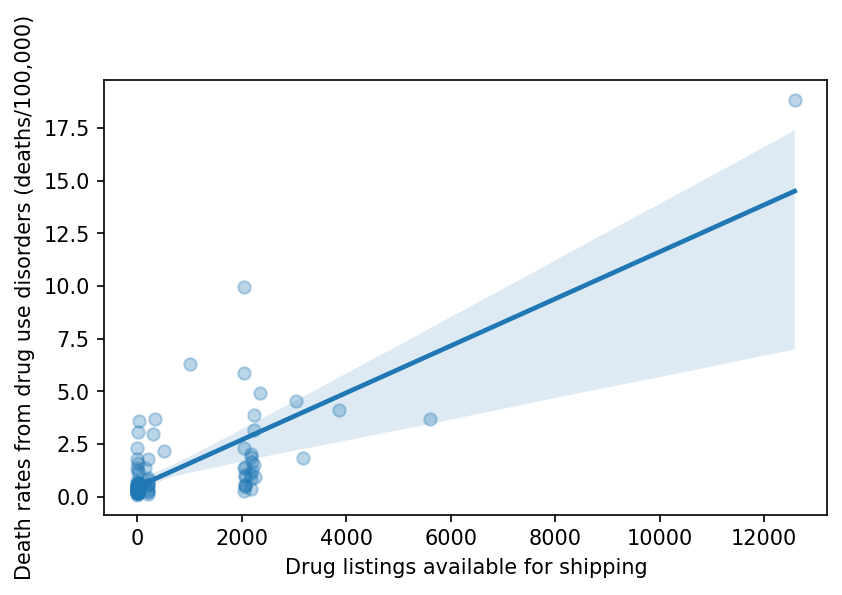

In [364]:
plt.figure(dpi=150)
sns.regplot(x="ship_to_count", y="drug_use_deaths", data=merge, scatter_kws={"alpha": 0.3});
plt.xlabel("Drug listings available for shipping", fontsize=10)
plt.ylabel("Death rates from drug use disorders (deaths/100,000)", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("drug_listings_vs_drug_deaths_regplot.pdf", bbox_inches="tight")

### Opioids

We will now add the [OWID data on opioid death rates per country](https://ourworldindata.org/grapher/death-rate-from-opioid-use) to our data:

In [328]:
df_opioid_death_rates = pd.read_csv("../dat/death-rate-from-opioid-use.csv")
df_opioid_death_rates.columns = ["entity", "code", "year", "opioid_death_rates"]
df_opioid_death_rates_current = df_opioid_death_rates[df_opioid_death_rates.year == df_opioid_death_rates.year.max()]
merge = pd.merge(merge, df_opioid_death_rates_current, left_on="iso_a3", right_on="code", how="left").drop(["entity", "code", "year"], axis=1)
merge

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ship_from_count,ship_from_count_normalized,ship_to_count,ship_to_count_normalized,mental_disorder_prevalence,opioid_death_rates
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,7.0,0.000008,11.540048,0.243600
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,12.584239,0.413111
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2931.0,8.227673e-05,1017.0,0.000029,14.953563,4.673499
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",12723.0,3.895283e-05,12583.0,0.000039,16.934621,13.693335
...,...,...,...,...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",3.0,4.218802e-07,201.0,0.000028,11.379480,0.580084
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,202.0,0.000314,11.634089,0.090891
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,14.584065,0.135451


In [329]:
def get_ship_to_count_per_country(df):
    ship_to_alpha_3 = df["ship_to_alpha_3"].dropna()
    ship_to_countries = ship_to_alpha_3.str.split(",")
    all_ship_to_countries = [country for cntries in ship_to_countries for country in cntries]
    shipping_availability_to_each_country = pd.Series(all_ship_to_countries).value_counts().rename("ship_to_count").to_frame()
    return shipping_availability_to_each_country

In [330]:
opioid_shipping_availability_to_each_country = get_ship_to_count_per_country(
    df[df["grouped_drug_names"] == "Opioids"]).rename({"ship_to_count": "opioid_ship_to_count"}, axis=1
                                                     )
merge = pd.merge(merge, opioid_shipping_availability_to_each_country, left_on="iso_a3", right_index=True, how="left")
merge

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ship_from_count,ship_from_count_normalized,ship_to_count,ship_to_count_normalized,mental_disorder_prevalence,opioid_death_rates,opioid_ship_to_count
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,7.0,0.000008,11.540048,0.243600,2.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,12.584239,0.413111,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2931.0,8.227673e-05,1017.0,0.000029,14.953563,4.673499,98.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",12723.0,3.895283e-05,12583.0,0.000039,16.934621,13.693335,1194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",3.0,4.218802e-07,201.0,0.000028,11.379480,0.580084,27.0
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,202.0,0.000314,11.634089,0.090891,27.0
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,14.584065,0.135451,NaN


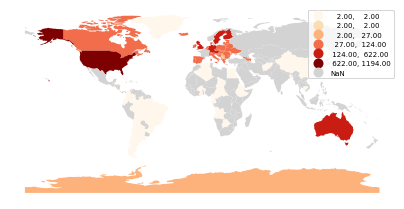

In [331]:
ax = merge.plot(column='opioid_ship_to_count',   
                legend=True,
                cmap='OrRd',
                scheme='percentiles',
                missing_kwds = dict(color = "lightgrey",))
#fig = ax.figure
#cb_ax = fig.axes[1] 
#cb_ax.tick_params(labelsize=20)
plt.axis('off');
plt.savefig("opioid_ship_to_count_map_absolute.pdf", bbox_inches="tight")

We can compare this to to the opioid death rate in each country as given by OWID:

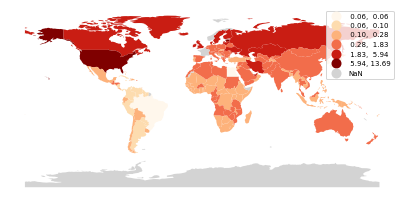

In [332]:
ax = merge.plot(column='opioid_death_rates', 
                legend=True,
                cmap='OrRd',
                scheme='percentiles',
                missing_kwds = dict(color = "lightgrey",))
#fig = ax.figure
#cb_ax = fig.axes[1] 
#cb_ax.tick_params(labelsize=20)
plt.axis('off');
plt.savefig("opioid_death_rates.pdf", bbox_inches="tight")

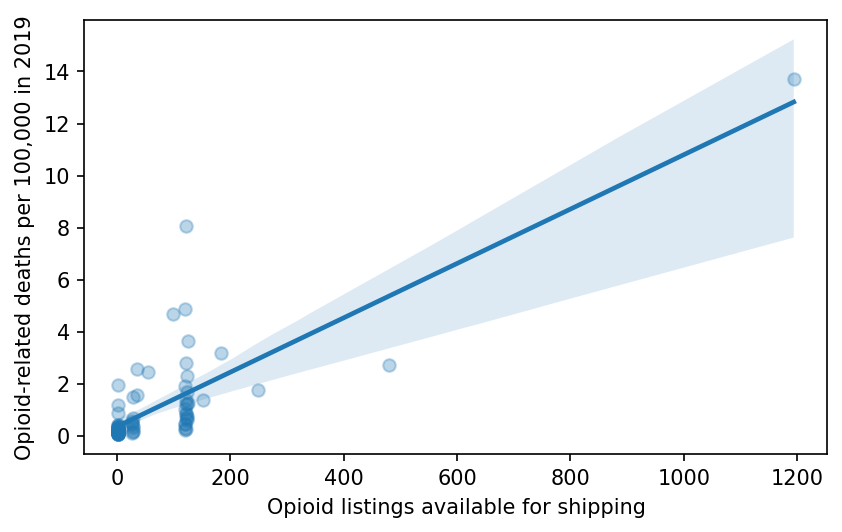

In [333]:
plt.figure(dpi=150)
sns.regplot(x="opioid_ship_to_count", y="opioid_death_rates", data=merge, scatter_kws={"alpha": 0.3});
plt.xlabel("Opioid listings available for shipping", fontsize=10)
plt.ylabel("Opioid-related deaths per 100,000 in 2019", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("opioid_listings_vs_death_rates_regplot.pdf", bbox_inches="tight")

### Amphetamines

In [334]:
df_amphetamines_death_rates = pd.read_csv("../dat/death-rate-amphetamine.csv")
df_amphetamines_death_rates.columns = ["entity", "code", "year", "amphetamine_death_rates"]
df_amphetamines_death_rates_current = df_amphetamines_death_rates[df_amphetamines_death_rates.year == df_amphetamines_death_rates.year.max()]
merge = pd.merge(merge, df_amphetamines_death_rates_current, left_on="iso_a3", right_on="code", how="left").drop(["entity", "code", "year"], axis=1)
merge

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ship_from_count,ship_from_count_normalized,ship_to_count,ship_to_count_normalized,mental_disorder_prevalence,opioid_death_rates,opioid_ship_to_count,amphetamine_death_rates
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,7.0,0.000008,11.540048,0.243600,2.0,0.014754
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,12.584239,0.413111,NaN,0.010575
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2931.0,8.227673e-05,1017.0,0.000029,14.953563,4.673499,98.0,0.362555
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",12723.0,3.895283e-05,12583.0,0.000039,16.934621,13.693335,1194.0,1.272203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",3.0,4.218802e-07,201.0,0.000028,11.379480,0.580084,27.0,0.038668
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,202.0,0.000314,11.634089,0.090891,27.0,0.006460
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,14.584065,0.135451,NaN,0.036723


In [335]:
amphetamine_shipping_availability_to_each_country = get_ship_to_count_per_country(
    df[df["grouped_drug_names"] == "Amphetamines"]).rename({"ship_to_count": "amphetamine_ship_to_count"}, axis=1
                                                     )
merge = pd.merge(merge, amphetamine_shipping_availability_to_each_country, left_on="iso_a3", right_index=True, how="left")
merge

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ship_from_count,ship_from_count_normalized,ship_to_count,ship_to_count_normalized,mental_disorder_prevalence,opioid_death_rates,opioid_ship_to_count,amphetamine_death_rates,amphetamine_ship_to_count
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,7.0,0.000008,11.540048,0.243600,2.0,0.014754,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,12.584239,0.413111,NaN,0.010575,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2931.0,8.227673e-05,1017.0,0.000029,14.953563,4.673499,98.0,0.362555,262.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",12723.0,3.895283e-05,12583.0,0.000039,16.934621,13.693335,1194.0,1.272203,2620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",3.0,4.218802e-07,201.0,0.000028,11.379480,0.580084,27.0,0.038668,51.0
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,202.0,0.000314,11.634089,0.090891,27.0,0.006460,51.0
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,14.584065,0.135451,NaN,0.036723,NaN


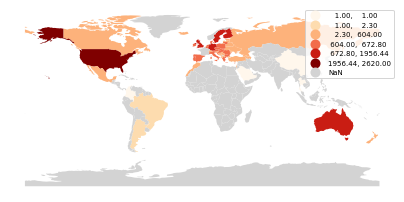

In [343]:
ax = merge.plot(column='amphetamine_ship_to_count', 
                legend=True,
                cmap='OrRd',
                scheme='percentiles',
                missing_kwds = dict(color = "lightgrey",))
#fig = ax.figure
#cb_ax = fig.axes[1] 
#cb_ax.tick_params(labelsize=20)
plt.axis('off');
plt.savefig("amphetamine_ship_to_count_map_absolute.pdf", bbox_inches="tight")

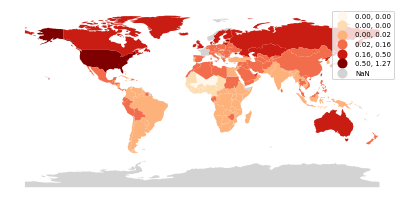

In [344]:
ax = merge.plot(column='amphetamine_death_rates', 
                legend=True,
                cmap='OrRd',
                scheme='percentiles',
                missing_kwds = dict(color = "lightgrey",))
#fig = ax.figure
#cb_ax = fig.axes[1] 
#cb_ax.tick_params(labelsize=20)
plt.axis('off');
plt.savefig("amphetamine_death_rates.pdf", bbox_inches="tight")

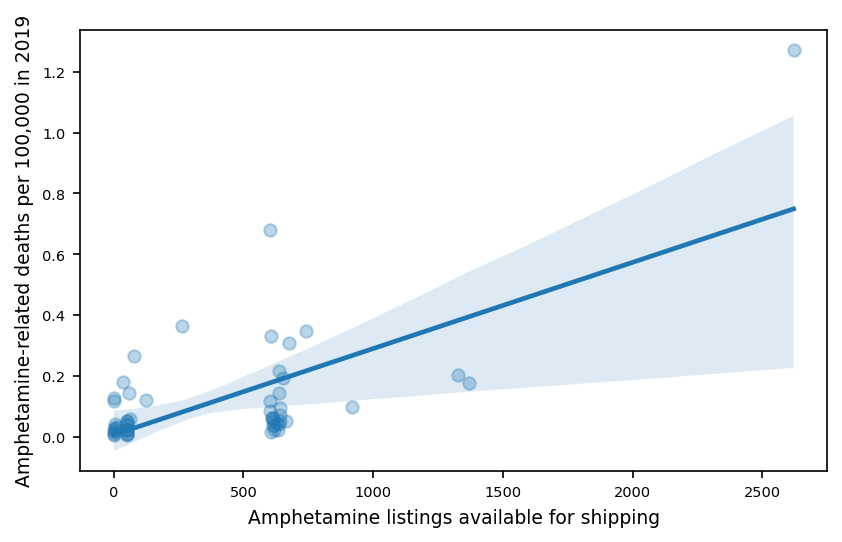

In [338]:
plt.figure(dpi=150)
sns.regplot(x="amphetamine_ship_to_count", y="amphetamine_death_rates", data=merge, scatter_kws={"alpha": 0.3});
plt.xlabel("Amphetamine listings available for shipping")
plt.ylabel("Amphetamine-related deaths per 100,000 in 2019")
plt.savefig("amphetamine_listings_vs_death_rates_regplot.pdf", bbox_inches="tight")

### Cocaine

In [339]:
df_cocaine_death_rates = pd.read_csv("../dat/death-rates-cocaine.csv")
df_cocaine_death_rates.columns = ["entity", "code", "year", "cocaine_death_rates"]
df_cocaine_death_rates_current = df_cocaine_death_rates[df_cocaine_death_rates.year == df_cocaine_death_rates.year.max()]
merge = pd.merge(merge, df_cocaine_death_rates_current, left_on="iso_a3", right_on="code", how="left").drop(["entity", "code", "year"], axis=1)
merge

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ship_from_count,ship_from_count_normalized,ship_to_count,ship_to_count_normalized,mental_disorder_prevalence,opioid_death_rates,opioid_ship_to_count,amphetamine_death_rates,amphetamine_ship_to_count,cocaine_death_rates
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,7.0,0.000008,11.540048,0.243600,2.0,0.014754,NaN,0.024632
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,12.584239,0.413111,NaN,0.010575,NaN,0.028760
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2931.0,8.227673e-05,1017.0,0.000029,14.953563,4.673499,98.0,0.362555,262.0,0.789073
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",12723.0,3.895283e-05,12583.0,0.000039,16.934621,13.693335,1194.0,1.272203,2620.0,2.308889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",3.0,4.218802e-07,201.0,0.000028,11.379480,0.580084,27.0,0.038668,51.0,0.022001
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,202.0,0.000314,11.634089,0.090891,27.0,0.006460,51.0,0.005013
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,14.584065,0.135451,NaN,0.036723,NaN,0.315391


In [340]:
cocaine_shipping_availability_to_each_country = get_ship_to_count_per_country(
    df[df["grouped_drug_names"] == "Cocaine"]).rename({"ship_to_count": "cocaine_ship_to_count"}, axis=1
                                                     )
merge = pd.merge(merge, cocaine_shipping_availability_to_each_country, left_on="iso_a3", right_index=True, how="left")
merge

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ship_from_count,ship_from_count_normalized,ship_to_count,ship_to_count_normalized,mental_disorder_prevalence,opioid_death_rates,opioid_ship_to_count,amphetamine_death_rates,amphetamine_ship_to_count,cocaine_death_rates,cocaine_ship_to_count
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,7.0,0.000008,11.540048,0.243600,2.0,0.014754,NaN,0.024632,4.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,12.584239,0.413111,NaN,0.010575,NaN,0.028760,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2931.0,8.227673e-05,1017.0,0.000029,14.953563,4.673499,98.0,0.362555,262.0,0.789073,61.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",12723.0,3.895283e-05,12583.0,0.000039,16.934621,13.693335,1194.0,1.272203,2620.0,2.308889,548.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",3.0,4.218802e-07,201.0,0.000028,11.379480,0.580084,27.0,0.038668,51.0,0.022001,21.0
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,202.0,0.000314,11.634089,0.090891,27.0,0.006460,51.0,0.005013,21.0
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,14.584065,0.135451,NaN,0.036723,NaN,0.315391,NaN


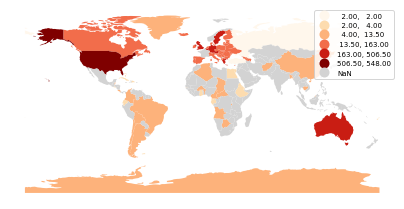

In [345]:
ax = merge.plot(column='cocaine_ship_to_count', 
                legend=True,
                cmap='OrRd',
                scheme='percentiles',
                missing_kwds = dict(color = "lightgrey",))
#fig = ax.figure
#cb_ax = fig.axes[1] 
#cb_ax.tick_params(labelsize=20)
plt.axis('off');
plt.savefig("cocaine_ship_to_count_map_absolute.pdf", bbox_inches="tight")

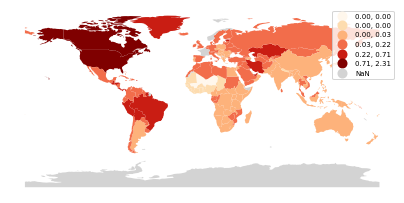

In [346]:
ax = merge.plot(column='cocaine_death_rates', 
                legend=True,
                cmap='OrRd',
                scheme='percentiles',
                missing_kwds = dict(color = "lightgrey",))
#fig = ax.figure
#cb_ax = fig.axes[1] 
#cb_ax.tick_params(labelsize=20)
plt.axis('off');
plt.savefig("cocaine_death_rates.pdf", bbox_inches="tight")

In [ ]:
plt.figure(dpi=150)
sns.regplot(x="cocaine_ship_to_count", y="cocaine_death_rates", data=merge, scatter_kws={"alpha": 0.3});
plt.xlabel("Cocaine listings available for shipping")
plt.ylabel("Cocaine-related deaths per 100,000 in 2019")
plt.savefig("cocaine_listings_vs_death_rates_regplot.pdf", bbox_inches="tight")

In [304]:
axes

array([<AxesSubplot:xlabel='Opioid listings available for shipping', ylabel='Opioid-related deaths per 100,000 in 2019'>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

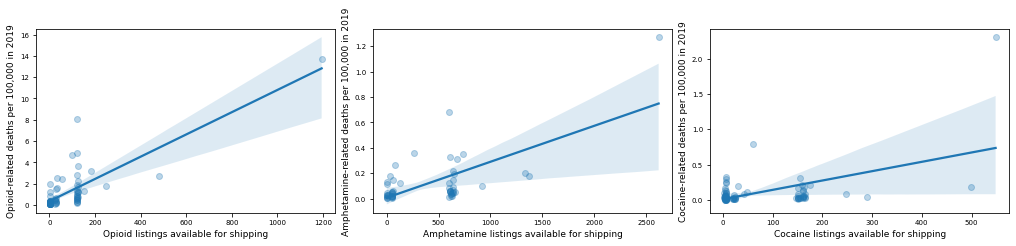

In [351]:
fig, axes = plt.subplots(1, 3, figsize=(14, 3))


for ax, drug_name in zip(axes, ["Opioid", "Amphetamine", "Cocaine"]):
    sns.regplot(ax=ax, x=drug_name.lower()+"_ship_to_count", y=drug_name.lower()+"_death_rates", data=merge, scatter_kws={"alpha": 0.3});
    ax.set_xlabel(drug_name + " listings available for shipping")
    ax.set_ylabel(drug_name + "-related deaths per 100,000 in 2019")
plt.savefig("drug_listings_vs_death_rates_regplots.pdf", bbox_inches="tight")